In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

S:\Users\sifat\anaconda3\envs\tf-gpu\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
S:\Users\sifat\anaconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
S:\Users\sifat\anaconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [112]:
sep_coins = cv2.imread('test images/pennies2.jpg')

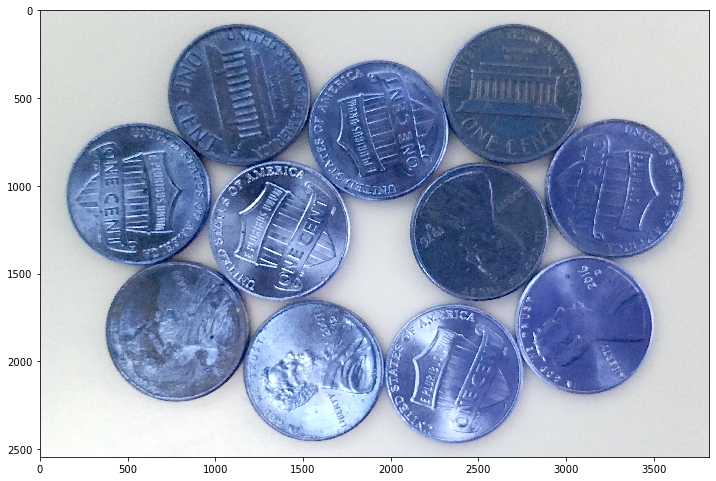

In [4]:
display(sep_coins)

In [5]:
# Median Blurr --> blurring the surface of the pennies
# Grayscale
# Binary Threshold
#Find Contours

In [6]:
sep_blur = cv2.medianBlur(sep_coins,25)

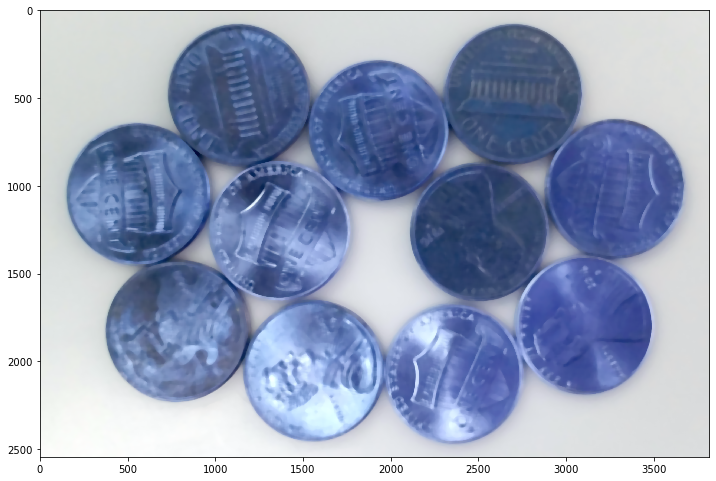

In [7]:
display(sep_blur)

In [8]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

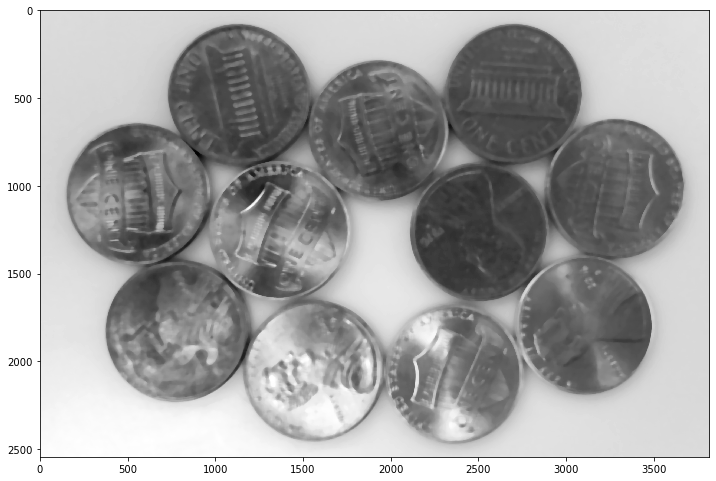

In [9]:
display(gray_sep_coins)

In [34]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,150,255,cv2.THRESH_BINARY_INV)

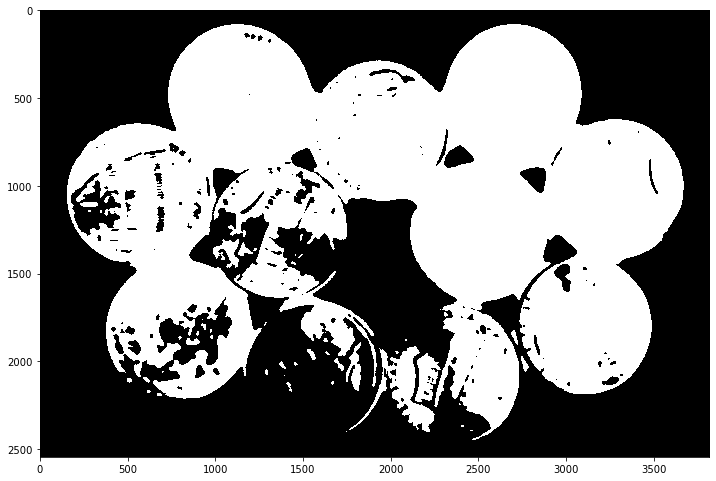

In [35]:
display(sep_thresh)

In [36]:
contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [107]:
# contours
# hierarchy

In [38]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

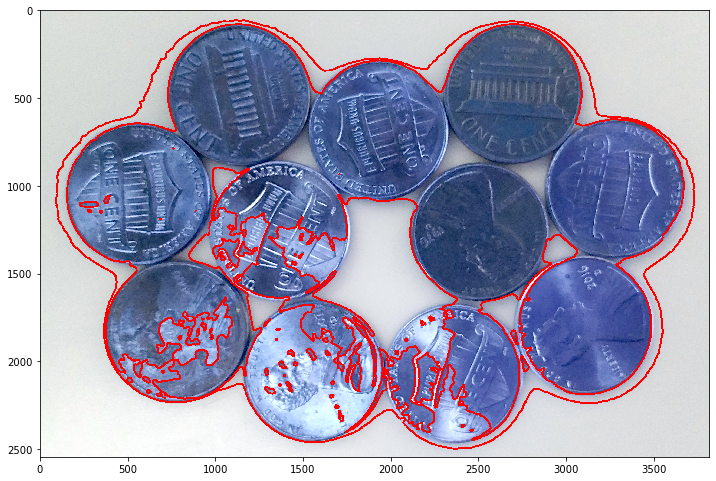

In [39]:
display(sep_coins)

In [16]:
## as you can see this process only finds the exteral contours
## as each coin supposed to work with indivdual contours in this process

In [53]:
img = cv2.imread('test images/pennies2.jpg')

In [54]:
img = cv2.medianBlur(img,25)

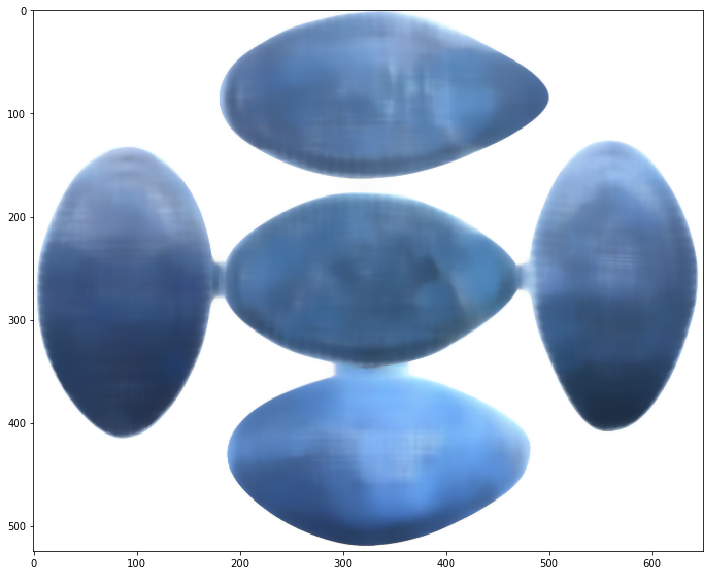

In [55]:
display(img)

In [56]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [85]:
# we are doing this in this way, because this threshodng giving 
# us the better result
ret, thresh = cv2.threshold(gray,210,255,cv2.THRESH_BINARY_INV) 
# ORSU THRESHOL wrokes really well with watershed algorithm , but
#in our picture it was not working well, after all this is about 
# try and erroring

# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 


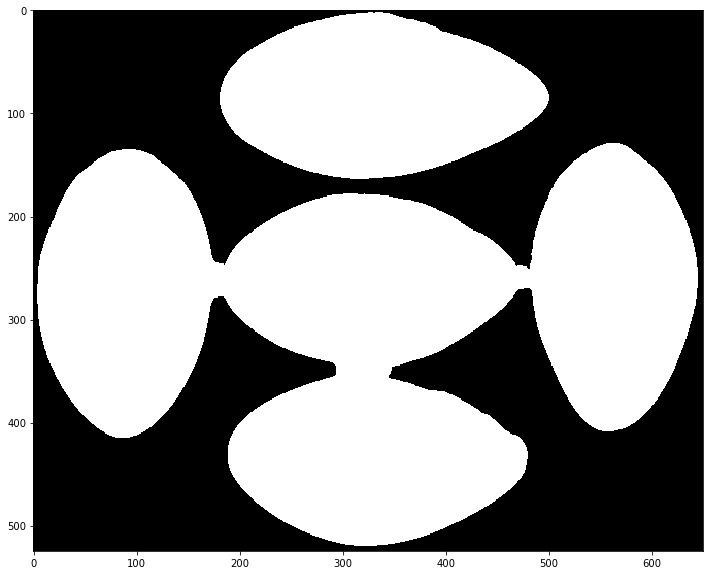

In [86]:
display(thresh)

In [87]:
# NOISE REMOVAL

In [88]:
kernel = np.ones((3,3),np.uint8)

In [89]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [90]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

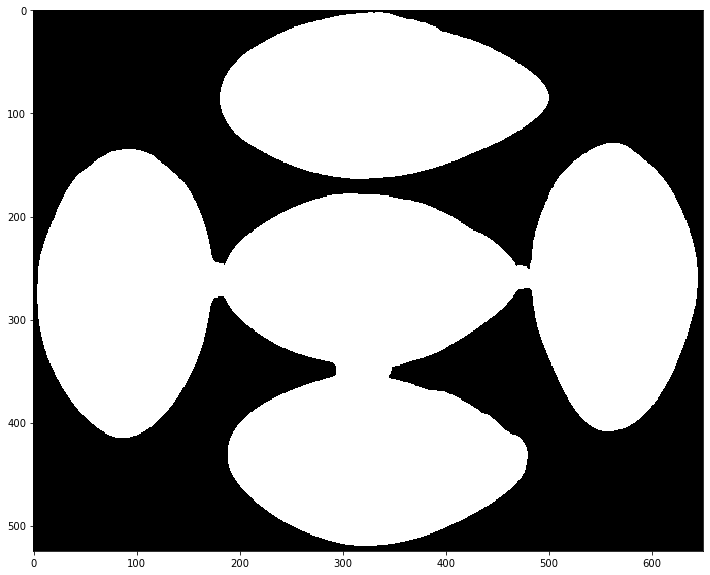

In [91]:
display(opening)

In [92]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

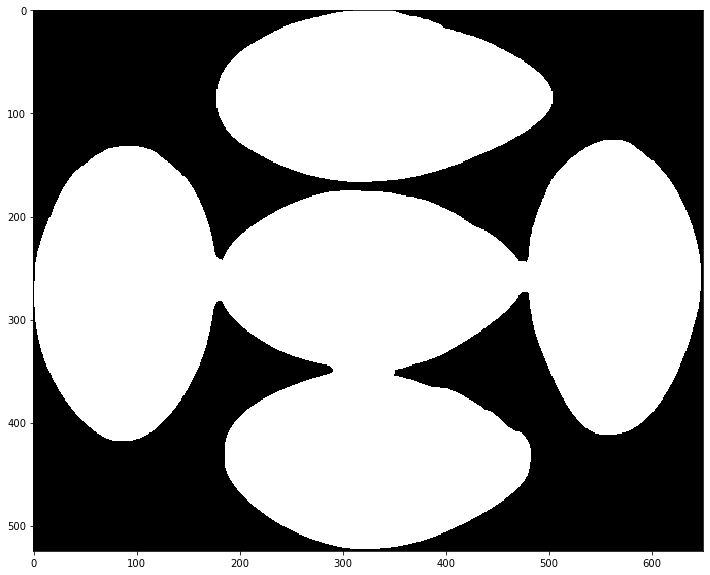

In [93]:
display(sure_bg)

In [94]:
# distance transform
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

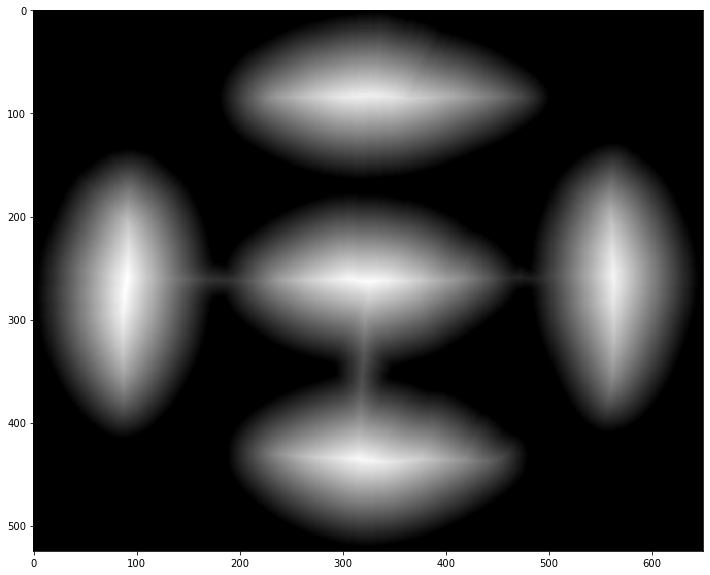

In [95]:
display(dist_transform)

In [96]:
ret, sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

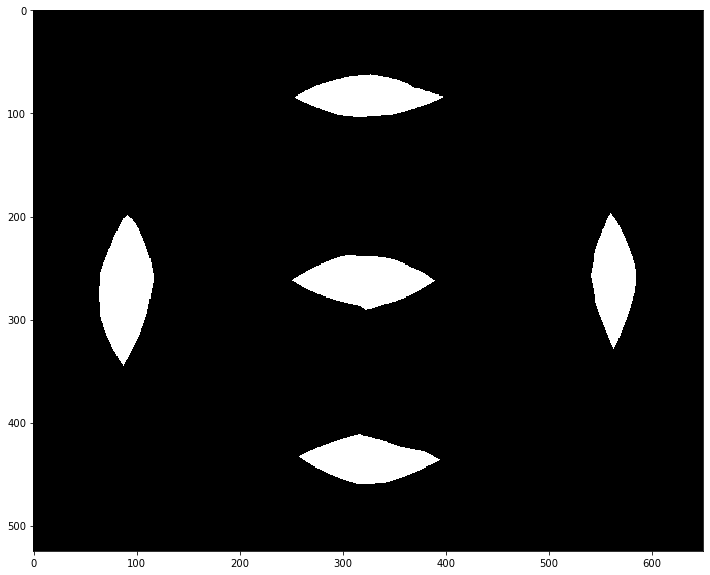

In [97]:
display(sure_fg)

In [98]:
sure_fg = np.uint8(sure_fg)

In [99]:
unknown = cv2.subtract(sure_bg,sure_fg)

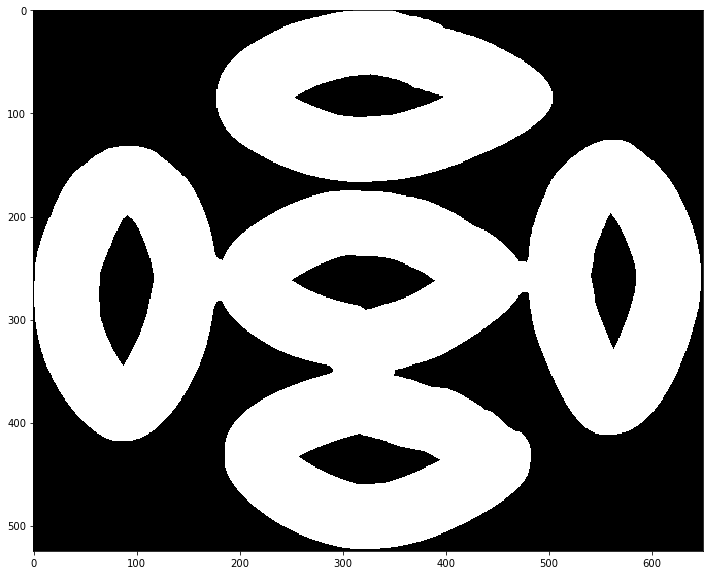

In [100]:
display(unknown)

In [101]:
## MARK the for ground
ret,markers = cv2.connectedComponents(sure_fg)

In [102]:
## ADDING ONE TO DIFFERENTIATE THE KNOWN AND UNKNOWN REGION OF THE IMAGE
markers = markers+1

In [103]:
# MARKING UKNOWN REGION TO 0 means we BLACKING them
markers[unknown==255]=0

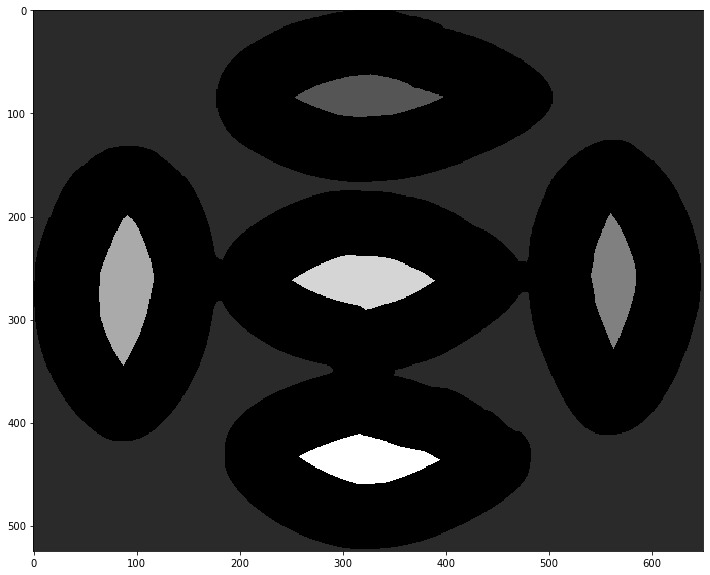

In [104]:
display(markers)

In [105]:
markers = cv2.watershed(img,markers)

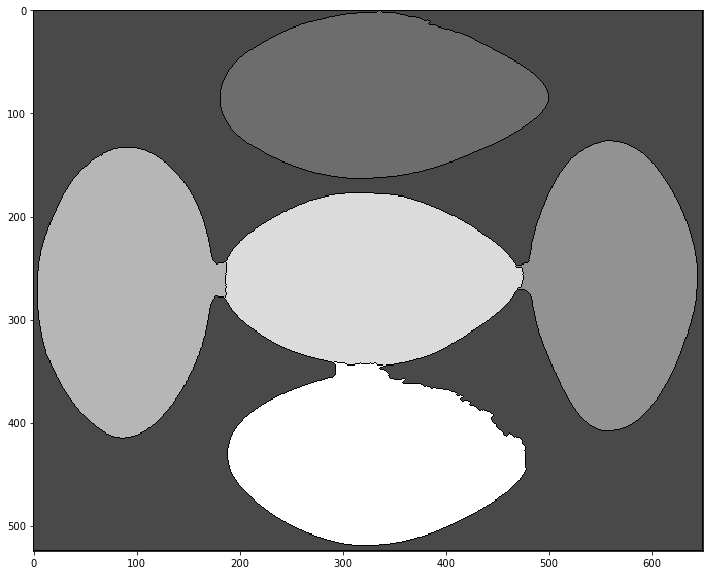

In [106]:
display(markers)

In [113]:
contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

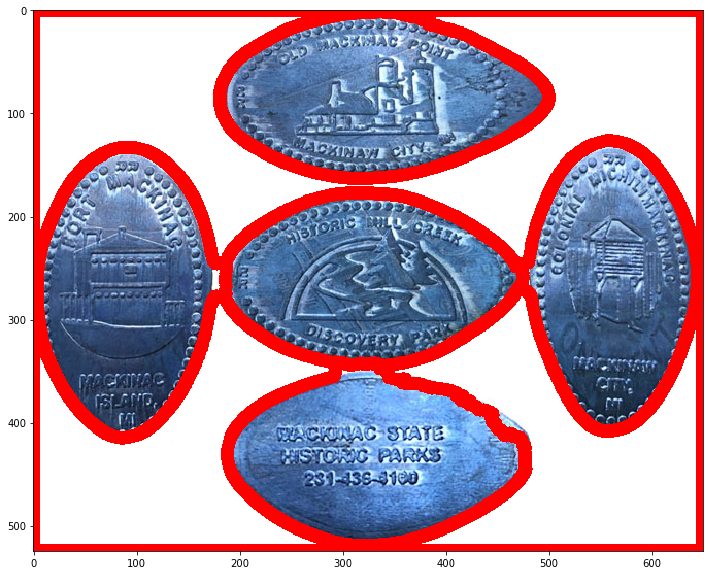

In [114]:
display(sep_coins)